In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import os
import subprocess
from distutils.dir_util import remove_tree
import shutil
import time
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# # Create your connection.
run = 'fast_dhsvm_pnnlWY2009_592_cormet'
cnx = sqlite3.connect(run+'.db')
simulations = pd.read_sql_query("SELECT * FROM " +run, cnx)

#if saved as a pickle file
#simulations = pd.read_pickle("simulation.pkl")



In [6]:
#validation = pd.read_csv('validation_1hr_Mar2007.csv')
validation = pd.read_csv('AbvWhitechuck200703_validation.csv')
print("Number of Runs:", len(simulations))

Number of Runs: 594


In [7]:
#load max data
maxQ = pd.read_csv('sim1.csv')
maxQ = maxQ.transpose()
maxQ = maxQ.reset_index()
maxQ = pd.to_numeric(maxQ['index'], errors='coerce')

In [9]:
#convert simulations to a pickle file
#simulations.to_pickle("5P_Channel_simulation.pkl")
maxQ

0       803.833333
1       817.222222
2       833.305556
3       857.833333
4       884.305556
5       860.027778
6       847.472222
7       841.805556
8       840.777778
9       849.388889
10      862.111111
11      880.666667
12      910.055556
13      890.972222
14      875.750000
15      868.388889
16      866.555556
17      869.611111
18      878.083333
19      891.861111
20      916.000000
21      910.027778
22      890.500000
23      881.472222
24      880.500000
25      881.694444
26      882.888889
27      896.083333
28      919.611111
29      928.444444
          ...     
565    1030.833333
566     990.138889
567     951.888889
568     901.472222
569            NaN
570     848.472222
571            NaN
572     896.250000
573     904.027778
574     897.888889
575            NaN
576     852.805556
577     813.000000
578     805.222222
579     843.361111
580     868.472222
581     882.694444
582     886.972222
583     874.777778
584     854.388889
585     821.500000
586     794.

In [10]:
#find max NS value run
simulations.head(50)
sim_obj_mx = simulations[simulations['like1'] == simulations['like1'].max()]
sim_obj_mx


,like1,parexponential_decrease_62,parlateral_conductivity_62,parexponent,chain
425,1.106,2.312,0.000385,-0.1993,1.0


In [11]:
simulations.iloc[425]

like1                             1.106
parexponential_decrease_62        2.312
parlateral_conductivity_62    0.0003848
parexponent                     -0.1993
chain                               1.0
Name: 425, dtype: object

In [12]:
maxQ.loc[425]

1007.9166666666665

In [13]:
# streamflow_only = 'output/PNNLWRF/Streamflow.Only'

# with open(streamflow_only, 'r') as file_output:
#             header_name = file_output.readlines()[0].split(' ')

# with open(streamflow_only) as inf:
#             next(inf)
#             date_q = []
#             q_12189500 = []
#             for line in inf:
#                 parts = line.split()
#                 if len(parts) > 1:
#                     date_q.append(parts[0])
#                     q_12189500.append(float(parts[2])/(3600*3))

# Simulation_streamflow = pd.DataFrame({'x[0]':date_q, 'x[2]':q_12189500})
# Simulation_streamflow.columns = [header_name[0], header_name[2]]
# Simulation_streamflow.to_csv('Benchmark.csv',index = False)
# Simulation_streamflow = pd.read_csv('Benchmark.csv')
# Benchmark = Simulation_streamflow['12189500'].values

In [14]:
#get all simulations with objective function higher than threshold
sim_ok = simulations[simulations['like1'] >= 1.05]
sim_ok_ind = sim_ok.index
sim_ok_ind

Int64Index([ 33,  84,  88,  89,  93,  94,  95,  96,  97,  98, 100, 101, 102,
            104, 105, 106, 107, 108, 109, 199, 207, 208, 265, 273, 274, 281,
            282, 330, 332, 333, 337, 338, 339, 340, 341, 346, 347, 348, 349,
            416, 417, 418, 424, 425, 426, 432, 433, 434, 441, 556, 557, 558,
            564, 565, 566, 567, 572, 573, 574],
           dtype='int64')

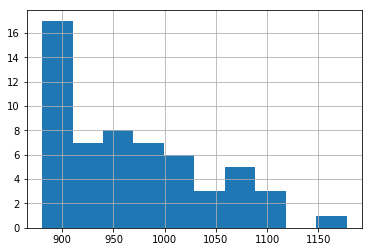

In [15]:
#look at distribution of peak flows in calibration runs that have e NS higher than threshold
maxQ_filt = maxQ.loc[sim_ok_ind]
maxQ_filt.hist()

### Max peak flow parameter set, NS above threhsold

In [16]:
#find max flow rate of filtered simulations and index
maxQ_filt_mx = maxQ_filt.max()
maxQ_filt_mx


1177.4444444444443

In [17]:
maxQ_filt_mx_ind = maxQ[maxQ == maxQ_filt_mx].index[0]
maxQ_filt_mx_ind



98

In [18]:
#find simulation details of max flow rate in filtered model runs
sim_filt_obj_mx = simulations.iloc[maxQ_filt_mx_ind]
sim_filt_obj_mx

like1                            1.052
parexponential_decrease_62       2.549
parlateral_conductivity_62    0.000272
parexponent                    -0.1984
chain                              1.0
Name: 98, dtype: object

### MIN quantile peak flow parameter set, NS above threshold

In [19]:
#find max flow rate of filtered simulations and index
maxQ_filt_mn = maxQ_filt.min()
maxQ_filt_mn

880.4166666666665

In [20]:
maxQ_filt_mn_ind = maxQ[maxQ == maxQ_filt_mn].index[0]
maxQ_filt_mn_ind

208

#### plot objective function value versus iteration number

In [21]:
fields=[word for word in results.dtype.names if word.startswith('sim')]
fig= plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
for i in range(int(float(max(results['chain'])))+1):
    res_chains = np.array([int(float(r)) for r in results['chain']])
    index=np.where(res_chains==i)
    plt.plot(results['like1'][index], label='Chain '+str(i+1))

plt.ylabel('Likelihood value')
plt.legend()
plt.grid(linewidth=0.5)
# ax =plt.subplot(2,1,2)

# r_hat = np.load('outfile.npy')
# r_hat=np.array(r_hat)
# ax.plot([1.2]*len(r_hat),'k--')
# for i in range(len(r_hat[0])):
#     ax.plot(r_hat[:,i],label='x'+str(i+1))

# ax.set_yscale("log", nonposy='clip')
# ax.set_ylim(-1,50)
# ax.set_ylabel('R$^d$ - convergence diagnostic')
# plt.xlabel('Number of chainruns')
# plt.legend()
# fig.savefig('python_hymod_convergence.png',dpi=300)

NameError: name 'results' is not defined

In [22]:
validation.max()

datetime64    4/1/2007 0:00
value               329.843
dtype: object

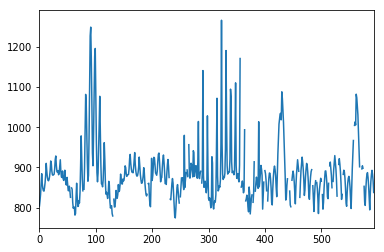

In [23]:
#check max list matches model results
maxQ.plot()
#NSmax.plot()
plt.show()

In [24]:
NS[20].max()
#max ns value run
NS[56].max()

NameError: name 'NS' is not defined

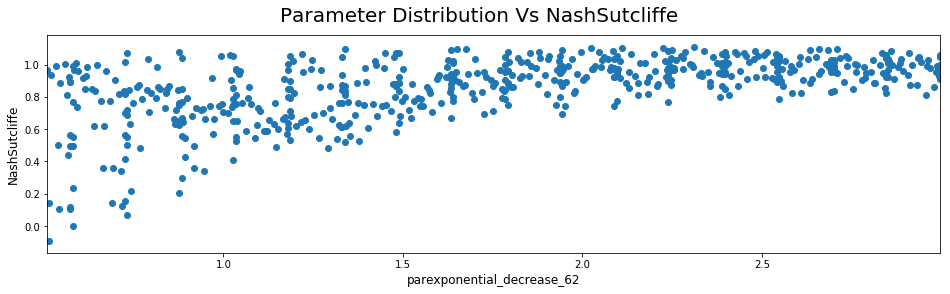

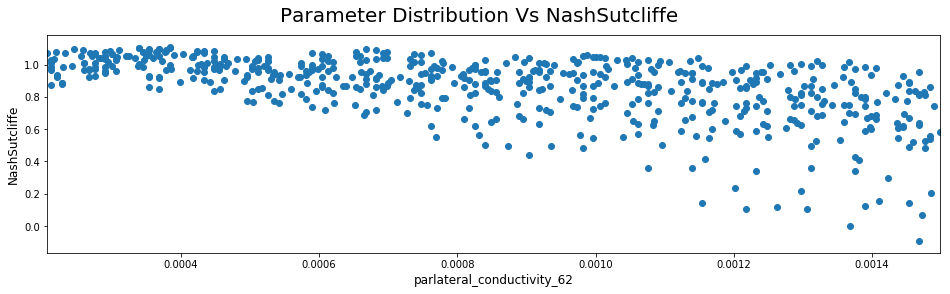

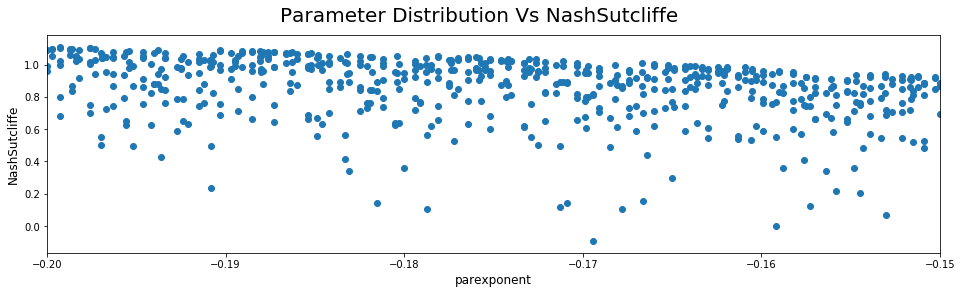

In [25]:
feature_variables = [col for col in simulations if col.startswith('par')]
for column_to_plot in feature_variables:
    plt.figure(figsize=(16,4))
    plt.scatter(simulations[column_to_plot], simulations['like1'])
    plt.xlabel(column_to_plot, fontsize=12)
    plt.ylabel('NashSutcliffe', fontsize=12)
    plt.suptitle('Parameter Distribution Vs NashSutcliffe', fontsize=20)
    plt.xlim(min(simulations[column_to_plot]), max(simulations[column_to_plot]))
    plt.savefig(column_to_plot+'_ParameterSensitivity_'+run+'.jpg',dpi=300, bbox_inches = 'tight')
    plt.show()

In [15]:
column_to_plot

'parexponent'